# **Experiment 2**

## Context
Followed by the results of experiment 1, This experiment aims to train an SVM model to predict the likelihood of customers purchasing more than one vehicle, facilitating targeted marketing strategies for potential repeat buyers, and evaluate its performance against a logistic regression model.

### 0. Import Packages

In [1]:
! pip install -r https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 26.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.1.1 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings

warnings.filterwarnings('ignore')

### 1.   Load Dataset

In [4]:
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [5]:
%cd /content/gdrive/MyDrive/ColabNotebooks/UTS_III/MLAA/MLAA_AT2/

/content/gdrive/MyDrive/ColabNotebooks/UTS_III/MLAA/MLAA_AT2


In [6]:
file_url = 'repurchase_dataset.csv'

In [7]:
df = pd.read_csv(file_url)

### 2. Explore Dataset

In [8]:
df.shape #to see how many rows and columns exist in the dataframe

(131337, 17)

In [9]:
df.info() #display info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131337 entries, 0 to 131336
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         131337 non-null  int64 
 1   Target                     131337 non-null  int64 
 2   age_band                   18962 non-null   object
 3   gender                     62029 non-null   object
 4   car_model                  131337 non-null  object
 5   car_segment                131337 non-null  object
 6   age_of_vehicle_years       131337 non-null  int64 
 7   sched_serv_warr            131337 non-null  int64 
 8   non_sched_serv_warr        131337 non-null  int64 
 9   sched_serv_paid            131337 non-null  int64 
 10  non_sched_serv_paid        131337 non-null  int64 
 11  total_paid_services        131337 non-null  int64 
 12  total_services             131337 non-null  int64 
 13  mth_since_last_serv        131337 non-null  

In [10]:
df.describe() #summary

,ID,Target,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
count,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000
mean,77097.384180,0.026809,5.493022,5.452500,5.472517,5.452287,5.497050,5.481692,5.454967,5.469807,5.502836,5.485438,5.480778
std,44501.636704,0.161525,2.843299,2.884328,2.870665,2.886528,2.878699,2.880408,2.875961,2.859756,2.854896,2.876772,2.867524
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,38563.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,77132.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,115668.000000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,154139.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [11]:
df.head() #first 5 columns

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,0,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,0,NaN,NaN,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,0,NaN,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,0,NaN,NaN,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,0,NaN,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9


In [12]:
df.isna().sum() #checking null values

ID                                0
Target                            0
age_band                     112375
gender                        69308
car_model                         0
car_segment                       0
age_of_vehicle_years              0
sched_serv_warr                   0
non_sched_serv_warr               0
sched_serv_paid                   0
non_sched_serv_paid               0
total_paid_services               0
total_services                    0
mth_since_last_serv               0
annualised_mileage                0
num_dealers_visited               0
num_serv_dealer_purchased         0
dtype: int64

### 3. Explore Target variable

Target value is 0 for people who did not purchase a second car and 1 for people who purchased a second car.

In [13]:
target = 'Target'

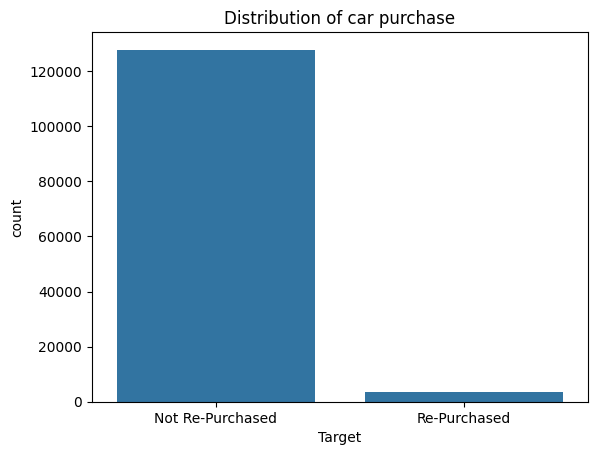

In [14]:
# Plotting bar for distribution of car purchase
barplot = sns.countplot(x=target, data=df)
plt.title('Distribution of car purchase')
barplot.set_xticklabels(['Not Re-Purchased', 'Re-Purchased'])
plt.show()

The bar chart clearly indicates that the dataset is imbalanced.

### 4. Explore Variables of Interest

In [15]:
cat_cols = ['gender', 'age_band','car_model', 'car_segment'] #Setting list of columns which has categorical values

In [16]:
# Display categorical column names and their unique data
for cols in cat_cols:
  print(cols)
  print(df[cols].unique())

gender
['Male' nan 'Female']
age_band
['3. 35 to 44' nan '1. <25' '4. 45 to 54' '2. 25 to 34' '7. 75+'
 '5. 55 to 64' '6. 65 to 74']
car_model
['model_1' 'model_2' 'model_3' 'model_5' 'model_6' 'model_4' 'model_7'
 'model_8' 'model_9' 'model_10' 'model_11' 'model_13' 'model_12'
 'model_14' 'model_15' 'model_16' 'model_17' 'model_18' 'model_19']
car_segment
['LCV' 'Small/Medium' 'Large/SUV' 'Other']


In [17]:
ord_cols = [x for x in df.columns if df[x].dtype=='int' and x not in ['ID', 'Target']] #Setting list of columns which has ordinal categorical values

In [18]:
# Display ordinal categorical column names and their unique data
for cols in ord_cols:
  print(cols)
  print(df[cols].unique())

age_of_vehicle_years
[ 9  6  5  8  7  1  3  4 10  2]
sched_serv_warr
[ 2 10  8  9  4  1  3  7  5  6]
non_sched_serv_warr
[10  3  9  5  4  8  1  6  2  7]
sched_serv_paid
[ 3 10  8  5  2  6  1  4  9  7]
non_sched_serv_paid
[ 7  4  9  3  1  2  6  5 10  8]
total_paid_services
[ 5  9 10  6  8  1  2  7  3  4]
total_services
[ 6 10  8  4  2  1  3  5  9  7]
mth_since_last_serv
[ 9  6  7  4  5  8  1  3 10  2]
annualised_mileage
[ 8 10  4  5  6  1  7  3  9  2]
num_dealers_visited
[10  7  6  9  4  5  2  1  3  8]
num_serv_dealer_purchased
[ 4 10  7  9  8  3  1  6  2  5]


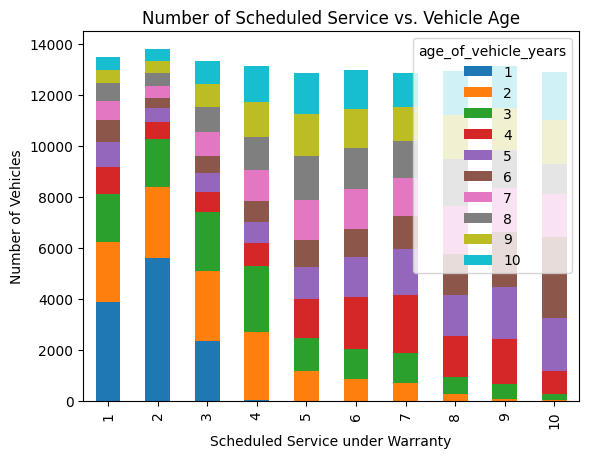

In [19]:
# Ploting stacked barplot
ctab = pd.crosstab(df['sched_serv_warr'], df['age_of_vehicle_years']) # Showing relation between Scheduled Service Warrenty and Age of Vehicle in Years
ctab.plot(kind='bar', stacked=True)
plt.title('Number of Scheduled Service vs. Vehicle Age')
plt.xlabel('Scheduled Service under Warranty')
plt.ylabel('Number of Vehicles')
plt.show()

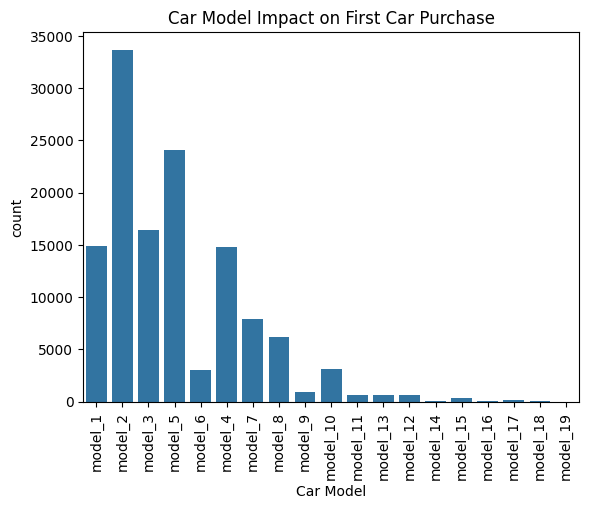

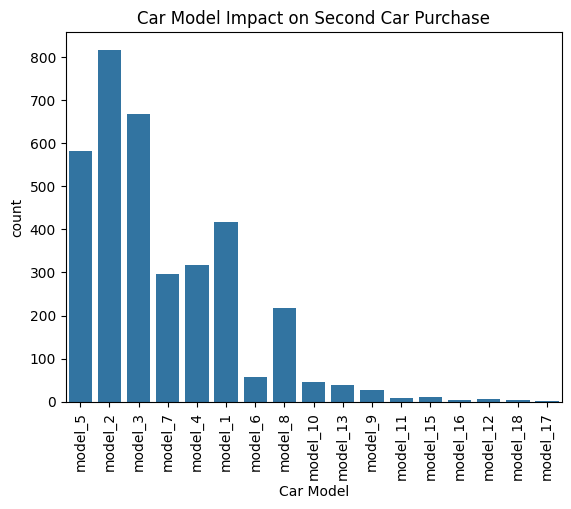

In [20]:
# Ploting Bar plot for car model impact on Purchase
for i in [0,1]:
  sns.countplot(x='car_model', data=df[df['Target']==i])
  if i==0:
    plt.title('Car Model Impact on First Car Purchase')
  else:
    plt.title('Car Model Impact on Second Car Purchase')
  plt.xticks(rotation=90)
  plt.xlabel('Car Model')
  plt.show()

### 5. Prepare Data

In [21]:
df_cleaned = df.copy()

In [22]:
# Removing Identifier
df_cleaned.drop(['ID'], inplace=True, axis=1)

In [23]:
# Filling Missing values
df_cleaned.gender.fillna('Not Specified', inplace=True)
df_cleaned.age_band.fillna('Not Specified', inplace=True)

In [24]:
#Checking duplicated values
df_cleaned.duplicated().sum()

2726

In [25]:
#Dropping all duplicate values
df_cleaned.drop_duplicates(inplace=True)

In [26]:
from sklearn.preprocessing import OneHotEncoder

# Creating one hot encoding for categorical variables
encoder = OneHotEncoder()
cat_cols_encoded = encoder.fit_transform(df_cleaned[cat_cols])

In [27]:
cat_cols_df = pd.DataFrame(cat_cols_encoded.toarray(), columns = encoder.get_feature_names_out())

In [28]:
# Dropping actual column after OneHotEncoder
df_cleaned.drop(cat_cols, inplace=True, axis=1)

In [29]:
# Resetting index after dropping values
df_cleaned.reset_index(drop=True, inplace=True)
cat_cols_df.reset_index(drop=True, inplace=True)

In [30]:
# Cleaned Data
df_cleaned = pd.concat([df_cleaned, cat_cols_df], axis=1)

### 6. Split Dataset

In [31]:
y = df_cleaned.pop(target)
X = df_cleaned

In [32]:
from sklearn.model_selection import train_test_split

X_data, X_test, y_data, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, stratify=y_data, random_state=42, test_size=0.2)

### 7. Baseline Model

From the result of experiment 1, taking Logistic Regression as base model.

In [33]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [39]:
# Creating pipeline for training
pipeline = Pipeline([
    ('Sampler', SMOTE(random_state=42)), # Sampler for training imbalanced data
    ('model', LogisticRegression(random_state=42, class_weight='balanced', C=1))
])
model = LogisticRegression(random_state=42, class_weight='balanced', C=1)

In [40]:
pipeline.fit(X_train, y_train)
model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight='balanced', random_state=42)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Calculating performance of the base model
train_perf = classification_report(y_train, pipeline.predict(X_train))
val_perf = accuracy_score(y_val, pipeline.predict(X_val))
test_perf = accuracy_score(y_test, pipeline.predict(X_test))

In [37]:
# Display performance of the base model
print(train_perf)
print(f"Validation Accuracy: {100*val_perf:.2f}%,\
      Test Accuracy: {100*test_perf:.2f}%")

              precision    recall  f1-score   support

           0       0.99      0.81      0.89     80056
           1       0.11      0.85      0.20      2254

    accuracy                           0.81     82310
   macro avg       0.55      0.83      0.55     82310
weighted avg       0.97      0.81      0.87     82310

Validation Accuracy: 80.80%,      Test Accuracy: 81.01%


In [41]:
importances = model.feature_importances_
features = X.columns
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

### 8. Train Machine Learning Model

In [ ]:
from sklearn.svm import SVC

# Creating a pipeline using SVC
pipeline_1 = Pipeline([
    ('Sampler', SMOTE(random_state=42)),
    ('model', SVC(random_state=42, C=1, max_iter=100))
])

In [ ]:
pipeline_1.fit(X_train, y_train)

Pipeline(steps=[('Sampler', SMOTE(random_state=42)),
                ('model', SVC(C=1, max_iter=100, random_state=42))])

### 9. Assess Model Performance

In [ ]:
y_preds_1 = pipeline_1.predict(X_train)

In [ ]:
#checking performance
print(classification_report(y_train, y_preds_1))

              precision    recall  f1-score   support

           0       0.99      0.74      0.85     80056
           1       0.08      0.84      0.15      2254

    accuracy                           0.75     82310
   macro avg       0.54      0.79      0.50     82310
weighted avg       0.97      0.75      0.83     82310



In [ ]:
# checking performance on unseen data
print(f"Validation Accuracy : {100*accuracy_score(y_val, pipeline_1.predict(X_val)):.2f}%")
print(f"Test Accuracy : {100*accuracy_score(y_test, pipeline_1.predict(X_test)):.2f}%")

Validation Accuracy : 74.22%
Test Accuracy : 74.29%


In [ ]:
# Tuning SVC
pipeline_2 = Pipeline([
    ('Sampler', SMOTE(random_state=42)),
    ('model', SVC(random_state=42, C=0.1, max_iter=100))
])

In [ ]:
pipeline_2.fit(X_train, y_train)

Pipeline(steps=[('Sampler', SMOTE(random_state=42)),
                ('model', SVC(C=0.1, max_iter=100, random_state=42))])

In [ ]:
y_preds2 = pipeline_2.predict(X_train)

In [ ]:
# Checking performance
print(classification_report(y_train, y_preds2))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89     80056
           1       0.08      0.57      0.14      2254

    accuracy                           0.81     82310
   macro avg       0.53      0.69      0.51     82310
weighted avg       0.96      0.81      0.87     82310



In [ ]:
print(f"Validation Accuracy : {100*accuracy_score(y_val, pipeline_2.predict(X_val)):.2f}%")
print(f"Test Accuracy : {100*accuracy_score(y_test, pipeline_2.predict(X_test)):.2f}%")

Validation Accuracy : 80.12%
Test Accuracy : 80.27%


In [ ]:
#Tuning SVC
pipeline_3 = Pipeline([
    ('Sampler', SMOTE(random_state=42)),
    ('model', SVC(random_state=42))
])

In [ ]:
pipeline_3.fit(X_train, y_train)

In [ ]:
y_preds3 = pipeline_3.predict(X_train)

In [ ]:
print(classification_report(y_train, y_preds3))

In [ ]:
print(f"Validation Accuracy : {100*accuracy_score(y_val, pipeline_3.predict(X_val)):.2f}%")
print(f"Test Accuracy : {100*accuracy_score(y_test, pipeline_3.predict(X_test)):.2f}%")

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay, roc_curve, roc_auc_score

In [ ]:
display = PrecisionRecallDisplay.from_estimator(pipeline, X_val, y_val, name='Logistic Regression')
display1 = PrecisionRecallDisplay.from_estimator(pipeline_1, X_val, y_val, ax=display.ax_, name='SVC C=1, max_iter=100')
display2 = PrecisionRecallDisplay.from_estimator(pipeline_2, X_val, y_val, ax=display.ax_, name='SVC C=0.1, max_iter=100')
display3 = PrecisionRecallDisplay.from_estimator(pipeline_3, X_val, y_val, ax=display.ax_, name='SVC C=1, max_iter=-1')
display.ax_.set_title('Precision-Recall curve')
plt.show()

In [ ]:
# probabilities for each model
y_probs = pipeline.decision_function(X_test)
y_probs1 = pipeline_1.decision_function(X_test)
y_probs2 = pipeline_2.decision_function(X_test)
y_probs3 = pipeline_3.decision_function(X_test)

In [ ]:
# ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_probs1)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_probs2)
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_probs3)

In [ ]:
# AUC scores
auc = roc_auc_score(y_test, y_probs)
auc1 = roc_auc_score(y_test, y_probs1)
auc2 = roc_auc_score(y_test, y_probs2)
auc3 = roc_auc_score(y_test, y_probs3)

In [ ]:
# Plot ROC curves
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='orange', label=f'Logistic Regression (area = {auc:.4f})')
plt.plot(fpr1, tpr1, color='blue', label=f'SVC(C=1, max_iter=100) (area = {auc1:.4f})')
plt.plot(fpr2, tpr2, color='green', label=f'SVC(C=0.1, max_iter=100) (area = {auc2:.4f})')
plt.plot(fpr3, tpr3, color='red', label=f'SVC(C=1, max_iter=-1) (area = {auc3:.4f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
# Plot confusion matrix on training dataset
cm = confusion_matrix(y_train, pipeline_3.predict(X_train))
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["Not Re-purchased", "Re-purchased"], yticklabels=["Not Re-purchased", "Re-purchased"])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix on Train Data')
plt.show()

In [ ]:
# Plot confusion matrix on validation dataset
cm_val = confusion_matrix(y_val, pipeline_3.predict(X_val))
plt.figure(figsize=(4,3))
sns.heatmap(cm_val, annot=True, fmt='d', cmap="Blues", xticklabels=["Not Re-purchased", "Re-Purchased"], yticklabels=["Not Re-purchased", "Re-Purchased"])
plt.title("Confusion Matrix on Validation data")
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Compared to experiment 1, the SVC model is performing better in unseen data.

In [ ]:
# Plot confusion matrix on validation dataset
cm_test = confusion_matrix(y_test, pipeline_3.predict(X_test))
plt.figure(figsize=(4,3))
sns.heatmap(cm_test, annot=True, fmt='d', cmap="Greens", xticklabels=["Not Re-purchased", "Re-Purchased"], yticklabels=["Not Re-purchased", "Re-Purchased"])
plt.title("Confusion Matrix on Test data")
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()